In [12]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Generated the dataset from morook.com

In [3]:
#loading the dataset into a pandas dataframe
df = pd.read_csv('MOCK_DATA.csv')
df

,Customer_ID,Churn,Age,Gender,Income,Contract_Length,Plan_Type,Monthly_Charges,Call_Minutes,Data_Usage,...,Service_Calls,Payment_Method,Late_Payments,Satisfaction_Rating,Complaints,Contract_End_Date,Auto_Renewal,Data_Plan_Price,Contract_Changes,Device_Type
0,1,False,68,Female,8,65,postpaid,59,66,96,...,22,credit card,36,5,85,3/23/2025,True,90,35,smartphone
1,2,True,21,Male,55,38,prepaid,56,53,68,...,82,debit card,43,2,5,1/29/2025,True,33,19,smartphone
2,3,False,29,Male,5,9,postpaid,91,84,89,...,53,bank transfer,28,2,64,11/28/2022,False,87,2,feature phone
3,4,False,37,Female,15,90,postpaid,89,54,17,...,31,credit card,5,4,98,3/7/2025,True,34,78,smartphone
4,5,True,81,Female,64,25,prepaid,15,73,94,...,86,bank transfer,18,4,39,12/10/2023,False,85,55,feature phone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,False,63,Male,47,29,prepaid,19,78,96,...,83,credit card,97,1,66,2/15/2023,True,70,12,tablet
996,997,True,36,Bigender,84,72,prepaid,5,26,37,...,95,bank transfer,71,5,88,10/4/2025,True,30,72,feature phone
997,998,True,45,Male,93,56,prepaid,39,10,31,...,72,debit card,23,3,87,2/27/2025,False,70,48,smartphone
998,999,True,71,Female,89,8,postpaid,84,45,31,...,30,credit card,96,3,25,12/25/2022,False,61,52,tablet


In [4]:
#describing the dataset
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          1000 non-null   int64 
 1   Churn                1000 non-null   bool  
 2   Age                  1000 non-null   int64 
 3   Gender               1000 non-null   object
 4   Income               1000 non-null   int64 
 5   Contract_Length      1000 non-null   int64 
 6   Plan_Type            1000 non-null   object
 7   Monthly_Charges      1000 non-null   int64 
 8   Call_Minutes         1000 non-null   int64 
 9   Data_Usage           1000 non-null   int64 
 10  Text_Messages        1000 non-null   int64 
 11  Roaming_Usage        1000 non-null   int64 
 12  Service_Calls        1000 non-null   int64 
 13  Payment_Method       1000 non-null   object
 14  Late_Payments        1000 non-null   int64 
 15  Satisfaction_Rating  1000 non-null   int64 
 16  Complai

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,50.891,19.667484,18.0,34.00,50.0,67.25,85.0
Income,1000.0,50.350,29.067549,1.0,25.00,52.0,75.00,100.0
Contract_Length,1000.0,49.587,29.740022,1.0,23.00,49.0,75.00,100.0
Monthly_Charges,1000.0,49.933,28.650678,1.0,25.75,49.0,74.25,100.0
Call_Minutes,1000.0,50.045,29.402610,1.0,24.00,49.0,75.00,100.0
Data_Usage,1000.0,51.885,28.514467,1.0,27.00,53.0,76.00,100.0
Text_Messages,1000.0,49.704,28.990392,1.0,24.75,48.0,75.00,100.0
Roaming_Usage,1000.0,52.611,28.291555,1.0,28.00,54.0,76.00,100.0
Service_Calls,1000.0,49.552,28.854148,1.0,25.00,48.0,75.00,100.0


In [6]:
#checking if there are any null values in the dataset
df.isna().sum()

Customer_ID            0
Churn                  0
Age                    0
Gender                 0
Income                 0
Contract_Length        0
Plan_Type              0
Monthly_Charges        0
Call_Minutes           0
Data_Usage             0
Text_Messages          0
Roaming_Usage          0
Service_Calls          0
Payment_Method         0
Late_Payments          0
Satisfaction_Rating    0
Complaints             0
Contract_End_Date      0
Auto_Renewal           0
Data_Plan_Price        0
Contract_Changes       0
Device_Type            0
dtype: int64

In [ ]:
#correlation analysis
df.corr()

In [8]:
#identifying the number of Churners against non-churners
df['Churn'].value_counts()

Churn
False    521
True     479
Name: count, dtype: int64

In [10]:
#checking to see if churners have phone service

#grouping the data by churn
df.groupby('Churn')['Call_Minutes'].mean()

Churn
False    48.537428
True     51.684760
Name: Call_Minutes, dtype: float64

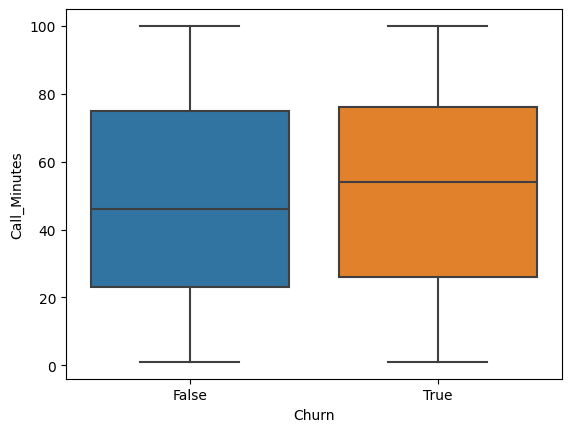

In [13]:
#visualizing Phone service between churners and non-churners
sns.boxplot(x='Churn', y='Call_Minutes', data=df)
plt.show()

In [14]:
#checking 'Late_Payments' between churners and non-churners
df.groupby('Churn')['Late_Payments'].mean()

Churn
False    50.940499
True     51.292276
Name: Late_Payments, dtype: float64

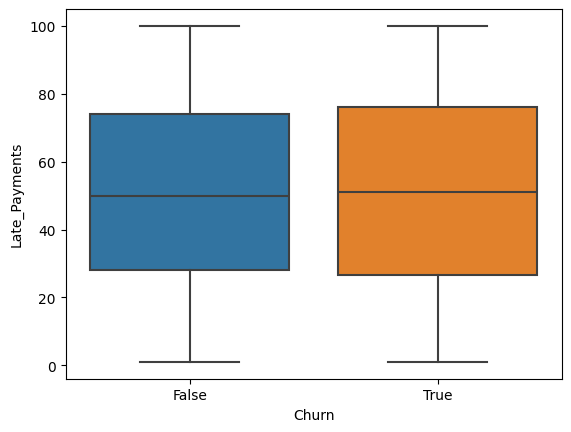

In [15]:
sns.boxplot(x='Churn', y='Late_Payments', data=df)
plt.show()

In [18]:
df.groupby('Churn')['Monthly_Charges'].mean()

Churn
False    50.570058
True     49.240084
Name: Monthly_Charges, dtype: float64

In [ ]:
sns.box